In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
#Data input
house_data = pd.read_csv('data/train.csv')

print(house_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
#Define predictor
y = house_data.SalePrice

#Define feature set
feature_set = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = house_data[feature_set]

#Split for training / testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1095 365 1095 365


In [27]:
#Define random forest regressor model with default n=100 trees
regressor = RandomForestRegressor(random_state=1)

#Fit model with training data
regressor.fit(X_train, y_train)

#Print model score
print(regressor.score(X_test, y_test))

0.8510709964442956


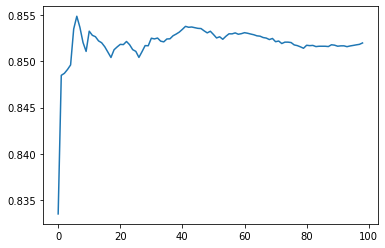

Number of trees: 60
Score: 0.8548729382957859


In [26]:
#Loop through range of n_estimators values to determine maximum potential score
scores = []
for i in range(10, 1000, 10):
    regressor = RandomForestRegressor(n_estimators = i, random_state=1)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))

#Graph resulting scores
plt.plot(scores)
plt.show()

#Find max score and correlating number of trees used in model generation
max_score = max(scores)
max_score_index = np.argmax(scores)
max_score_trees = max_score_index*10

print('Number of trees: {}\nScore: {}'.format(max_score_trees, max_score))